### import

In [9]:
# load modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts # for QQ plot
from scipy.stats import pearsonr # correlation p-values
from sklearn.linear_model import LinearRegression # regression output
import statsmodels.formula.api as smf # ols regression

### Set WD

In [11]:
# set working directory
os.chdir('C:\\Users\\kevin\\OneDrive\\Documents\\GitHub\\python\\week9labs\\data')  # change this to your filepath
os.getcwd()  # confirm change

'C:\\Users\\kevin\\OneDrive\\Documents\\GitHub\\python\\week9labs\\data'

### Load Data

In [64]:
# load hospital and personnel data
hospital_df = pd.read_csv('CaliforniaHospitalData.csv')
personnel_df = pd.read_csv('CaliforniaHospitalData_Personnel.txt', delimiter='\t')

In [15]:
hospital_df.info() #Quick inspection

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HospitalID   61 non-null     int64  
 1   Name         61 non-null     object 
 2   Zip          61 non-null     object 
 3   Website      61 non-null     object 
 4   TypeControl  61 non-null     object 
 5   Teaching     61 non-null     object 
 6   DonorType    61 non-null     object 
 7   NoFTE        61 non-null     float64
 8   NetPatRev    61 non-null     float64
 9   InOperExp    61 non-null     float64
 10  OutOperExp   61 non-null     float64
 11  OperRev      61 non-null     int64  
 12  OperInc      61 non-null     int64  
 13  AvlBeds      61 non-null     int64  
dtypes: float64(4), int64(4), object(6)
memory usage: 6.8+ KB


In [17]:
personnel_df.info() # Quick Inspection

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   HospitalID     64 non-null     int64 
 1   Work_ID        64 non-null     int64 
 2   LastName       64 non-null     object
 3   FirstName      64 non-null     object
 4   Gender         64 non-null     object
 5   PositionID     64 non-null     int64 
 6   PositionTitle  64 non-null     object
 7   Compensation   64 non-null     int64 
 8   MaxTerm        64 non-null     int64 
 9   StartDate      64 non-null     object
 10  Phone          64 non-null     object
 11  Email          64 non-null     object
dtypes: int64(5), object(7)
memory usage: 6.1+ KB


## Merge

In [66]:
# merge hospital and personnel data
merged_df = pd.merge(personnel_df, hospital_df, on='HospitalID', how='left')

# drop unnecessary columns
merged_df = merged_df.drop(columns=['Work_ID', 'PositionID', 'Website'])

In [22]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HospitalID     64 non-null     int64  
 1   LastName       64 non-null     object 
 2   FirstName      64 non-null     object 
 3   Gender         64 non-null     object 
 4   PositionTitle  64 non-null     object 
 5   Compensation   64 non-null     int64  
 6   MaxTerm        64 non-null     int64  
 7   StartDate      64 non-null     object 
 8   Phone          64 non-null     object 
 9   Email          64 non-null     object 
 10  Name           61 non-null     object 
 11  Zip            61 non-null     object 
 12  TypeControl    61 non-null     object 
 13  Teaching       61 non-null     object 
 14  DonorType      61 non-null     object 
 15  NoFTE          61 non-null     float64
 16  NetPatRev      61 non-null     float64
 17  InOperExp      61 non-null     float64
 18  OutOperExp  

### Add new row

In [70]:
# select only one row from Tahoe Forest Hospital District
new_row = merged_df[merged_df['Name'] == 'Tahoe Forest Hospital District'].copy().head(1)

# edit fields for the new personnel
new_row['FirstName'] = 'Kevin'
new_row['LastName'] = 'Good'
new_row['StartDate'] = pd.to_datetime('today').strftime('%Y-%m-%d')  # today's date
new_row['PositionTitle'] = 'State Board Representative'
new_row['Compensation'] = 89473
new_row['MaxTerm'] = 3

In [72]:
merged_df = pd.concat([merged_df, new_row], ignore_index=True)

In [74]:
merged_df.tail() # check to see if row added

,HospitalID,LastName,FirstName,Gender,PositionTitle,Compensation,MaxTerm,StartDate,Phone,Email,...,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds
60,33242,Frank,Vernon,M,Safety Inspection Member,23987,2,1/1/2011,801-687-2845,vernon.frank@ihc.com,...,Non Profit,Small/Rural,Charity,318.00,161745.22400,3.064671e+07,3.027761e+07,59669536.0,-1254783.0,42.0
61,46342,Tanner,Patricia,F,Acting Director,248904,8,1/1/2011,801-687-7877,patricia.tanner@prohealth.net,...,District,Small/Rural,Charity,160.00,65792.42623,1.534131e+07,7.916540e+06,24164520.0,906670.0,131.0
62,43437,Tanner,Patricia,F,Regional Representative,46978,4,1/1/2010,801-687-7877,patricia.tanner@prohealth.net,...,District,Small/Rural,Charity,121.00,17566.92896,2.890228e+06,4.578888e+06,6677960.0,-791156.0,37.0
63,29823,Tanner,Patricia,F,Acting Director,248904,8,1/1/2009,801-687-7877,patricia.tanner@prohealth.net,...,Non Profit,Small/Rural,Charity,168.00,51726.49180,9.022366e+06,1.040251e+07,19445901.0,21025.0,48.0
64,46985,Good,Kevin,M,State Board Representative,89473,3,2025-04-28,405-744-5687,frank.smith@edihealth.com,...,District,Small/Rural,Charity,374.32,209348.94260,3.478231e+07,4.815949e+07,83034898.0,93097.0,62.0


### Converting data type

In [76]:
# convert StartDate to datetime
merged_df['StartDate'] = pd.to_datetime(merged_df['StartDate'], errors='coerce')

# convert selected columns to category
categorical_columns = ['Gender', 'TypeControl', 'Teaching', 'DonorType']

for col in categorical_columns:
    merged_df[col] = merged_df[col].astype('category')

# quick check after conversions
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HospitalID     65 non-null     int64         
 1   LastName       65 non-null     object        
 2   FirstName      65 non-null     object        
 3   Gender         65 non-null     category      
 4   PositionTitle  65 non-null     object        
 5   Compensation   65 non-null     int64         
 6   MaxTerm        65 non-null     int64         
 7   StartDate      64 non-null     datetime64[ns]
 8   Phone          65 non-null     object        
 9   Email          65 non-null     object        
 10  Name           62 non-null     object        
 11  Zip            62 non-null     object        
 12  TypeControl    62 non-null     category      
 13  Teaching       62 non-null     category      
 14  DonorType      62 non-null     category      
 15  NoFTE          62 non-nul

### Descriptive stats

In [82]:
merged_df.describe(include=['number']) #Numerical

,HospitalID,Compensation,MaxTerm,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds
count,65.000000,65.000000,65.000000,62.000000,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,62.000000
mean,33136.276923,89549.107692,4.123077,1334.523226,6.621604e+05,1.641498e+08,8.948069e+07,2.534791e+08,-1.513419e+05,192.387097
std,12584.829319,83140.623731,2.102883,2012.436572,1.090048e+06,2.809568e+08,1.362641e+08,4.220611e+08,7.095572e+07,220.649961
min,10767.000000,23987.000000,2.000000,55.000000,1.417224e+04,1.436471e+06,3.787718e+06,5.235317e+06,-3.211633e+08,12.000000
25%,22181.000000,46978.000000,3.000000,216.375000,7.284830e+04,1.382645e+07,1.429398e+07,2.685966e+07,-1.028922e+06,42.750000
50%,34454.000000,46978.000000,4.000000,374.320000,1.728132e+05,3.227595e+07,3.582774e+07,6.393148e+07,1.464124e+06,99.000000
75%,43353.000000,89473.000000,4.000000,1137.000000,5.317051e+05,1.639284e+08,8.867309e+07,1.982414e+08,6.146421e+06,228.250000
max,81351.000000,248904.000000,8.000000,8000.000000,4.662582e+06,1.285631e+09,6.621559e+08,1.912179e+09,1.648724e+08,909.000000


In [84]:
merged_df.describe(include=['object']) #Text summary

,LastName,FirstName,PositionTitle,Phone,Email,Name,Zip
count,65,65,65,65,65,62,62
unique,27,23,4,27,27,61,61
top,Smith,David,Regional Representative,801-687-7877,patricia.tanner@prohealth.net,Tahoe Forest Hospital District,96161
freq,4,6,24,3,3,2,2


In [86]:
merged_df.describe(include=['category'])

,Gender,TypeControl,Teaching,DonorType
count,65,62,62,62
unique,2,4,2,2
top,F,Non Profit,Small/Rural,Charity
freq,33,37,45,45


### Histogram

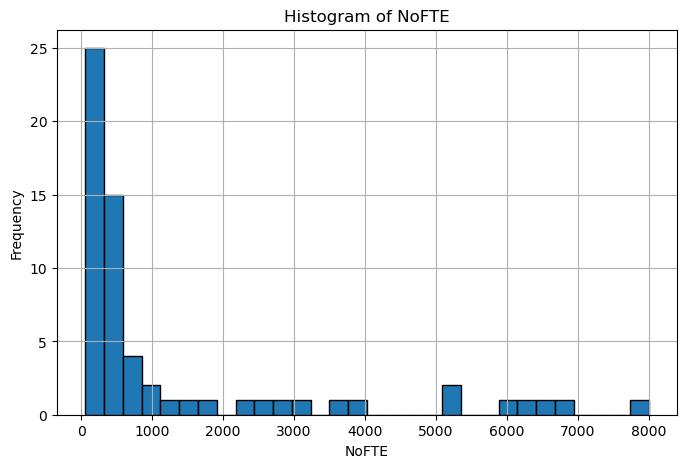

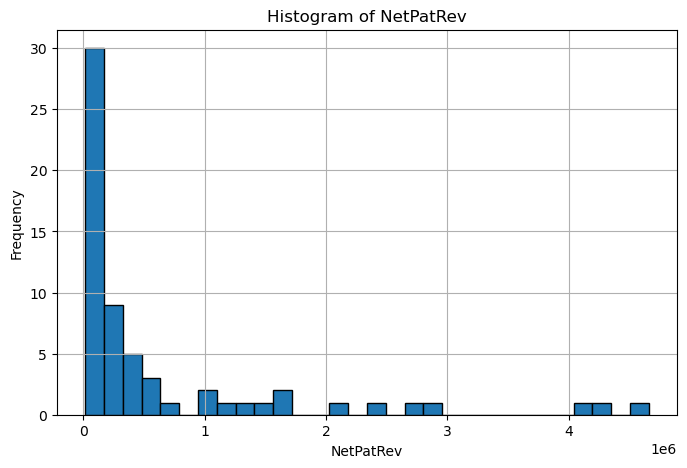

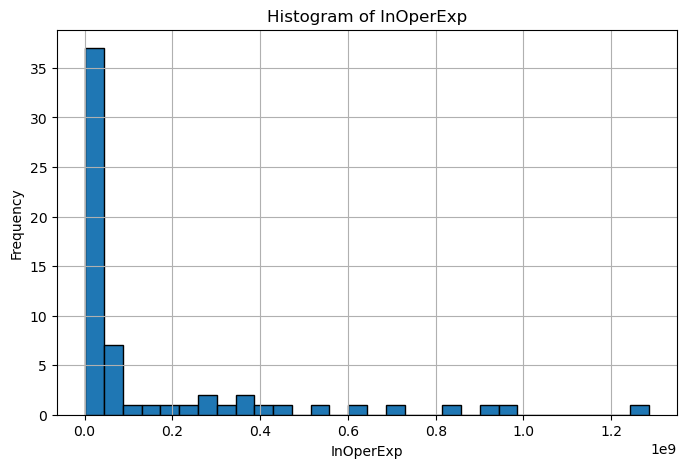

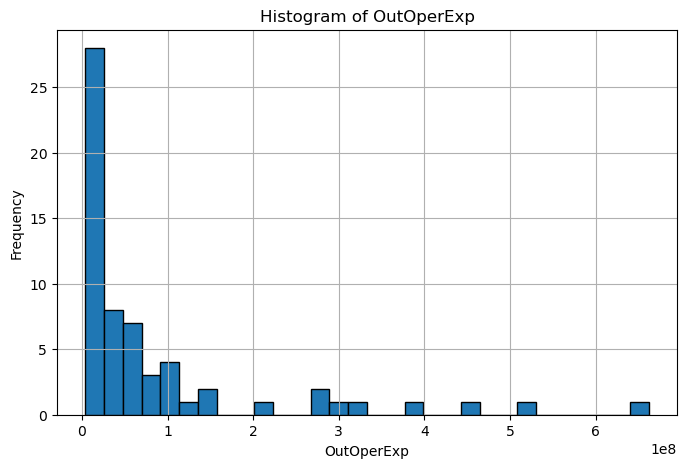

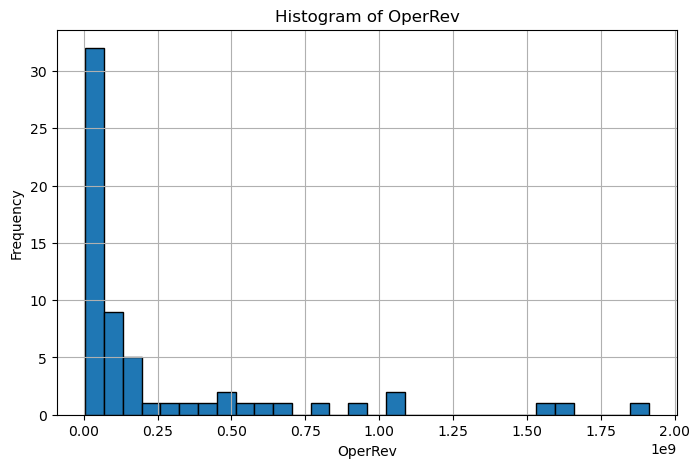

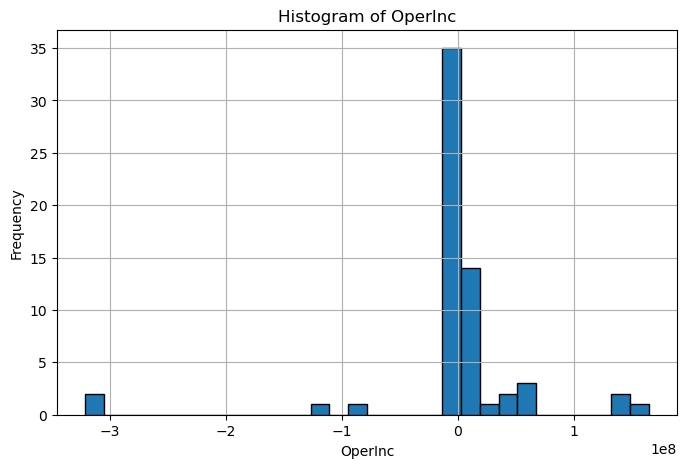

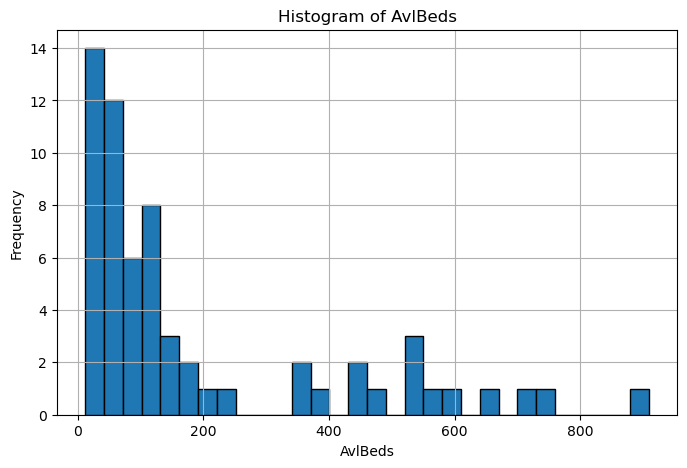

In [92]:
# list of variables to plot separately
hist_vars = ['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds']

# loop to plot each one separately
for var in hist_vars:
    plt.figure(figsize=(8,5))
    merged_df[var].dropna().plot(kind='hist', bins=30, edgecolor='black')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


### Scatter Plot

<Figure size 800x500 with 0 Axes>

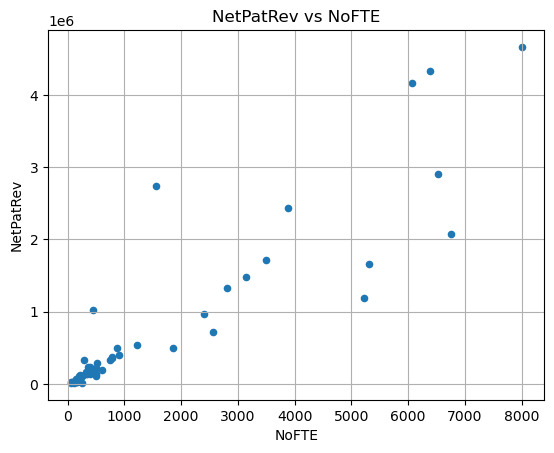

<Figure size 800x500 with 0 Axes>

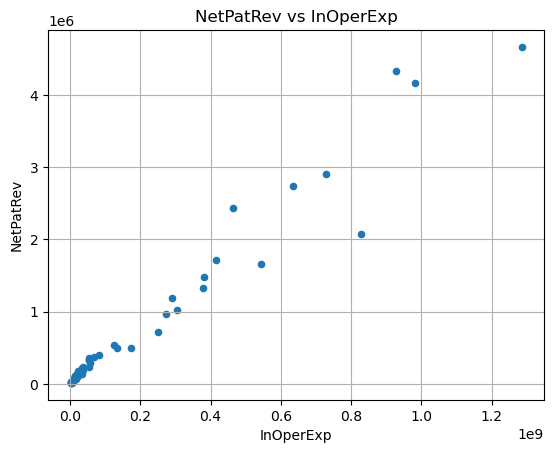

<Figure size 800x500 with 0 Axes>

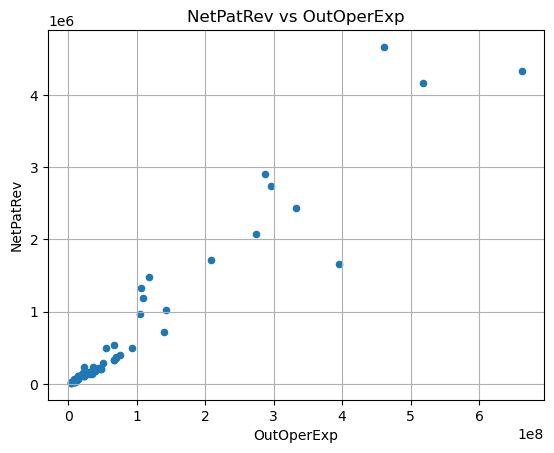

<Figure size 800x500 with 0 Axes>

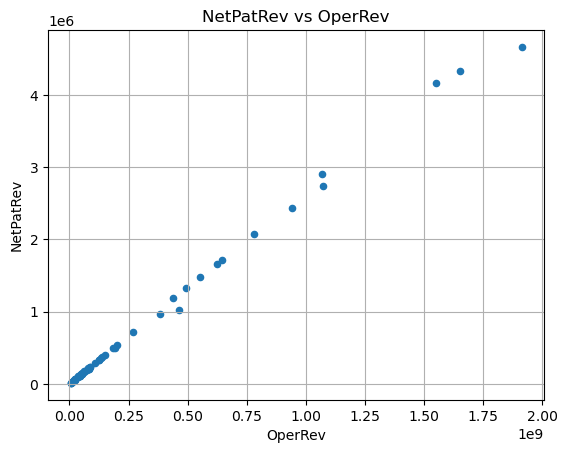

<Figure size 800x500 with 0 Axes>

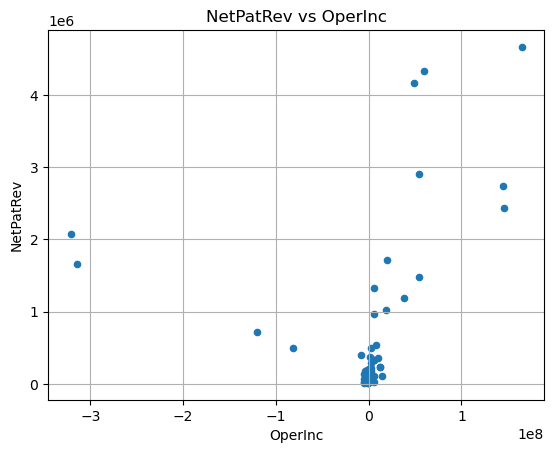

<Figure size 800x500 with 0 Axes>

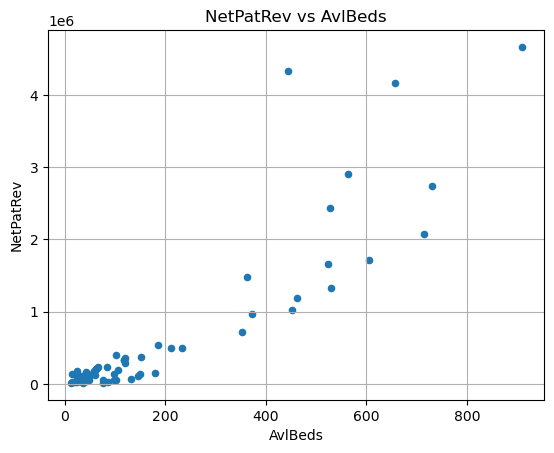

In [96]:
# list of variables to plot against NetPatRev
scatter_vars = ['NoFTE', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds']

# create scatterplots
for var in scatter_vars:
    plt.figure(figsize=(8, 5))
    merged_df.plot.scatter(x=var, y='NetPatRev')
    plt.title(f'NetPatRev vs {var}')
    plt.grid(True)
    plt.show()


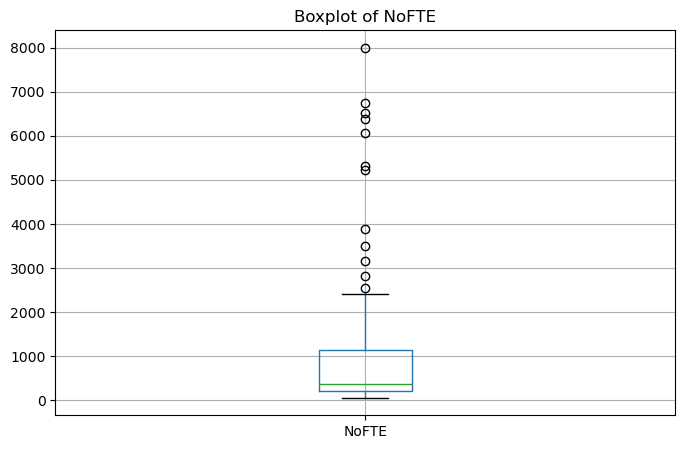

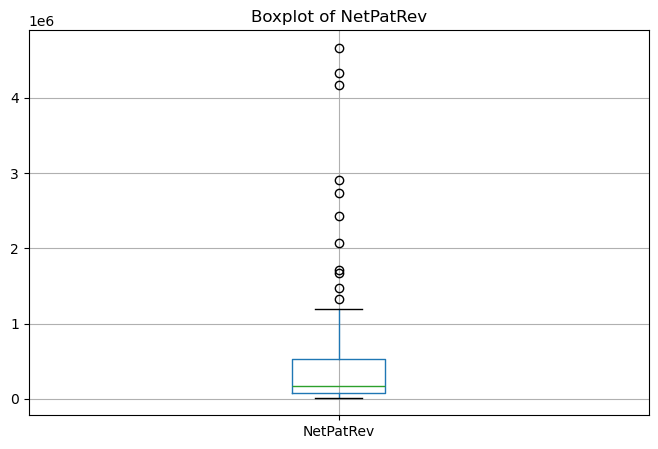

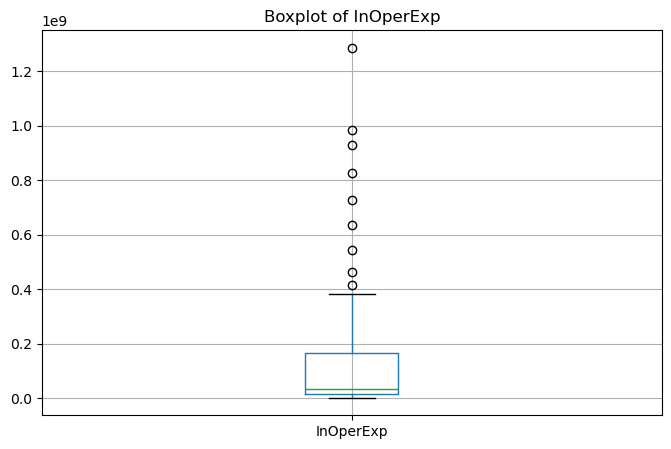

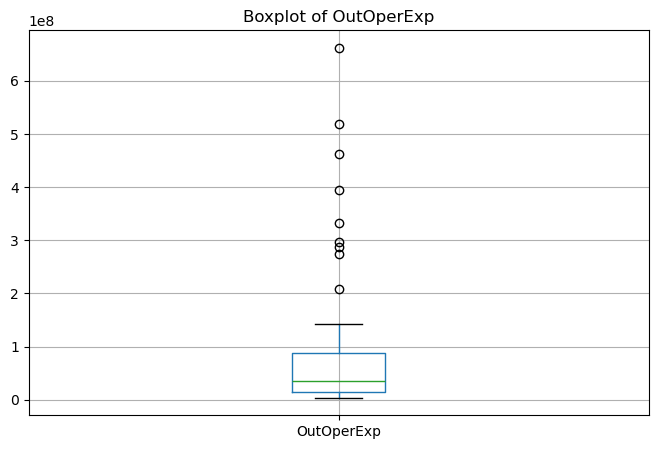

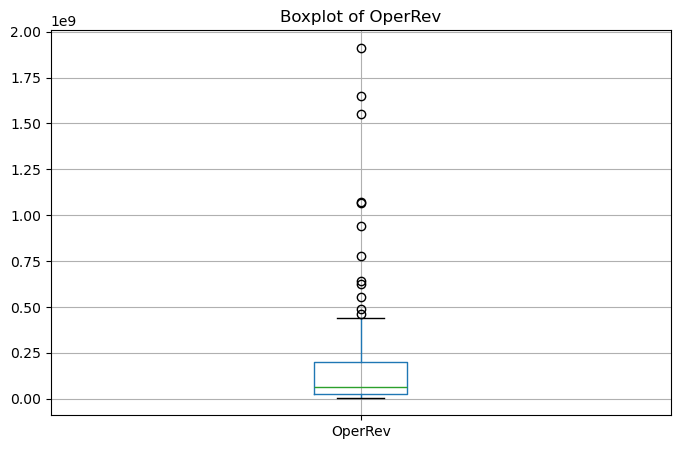

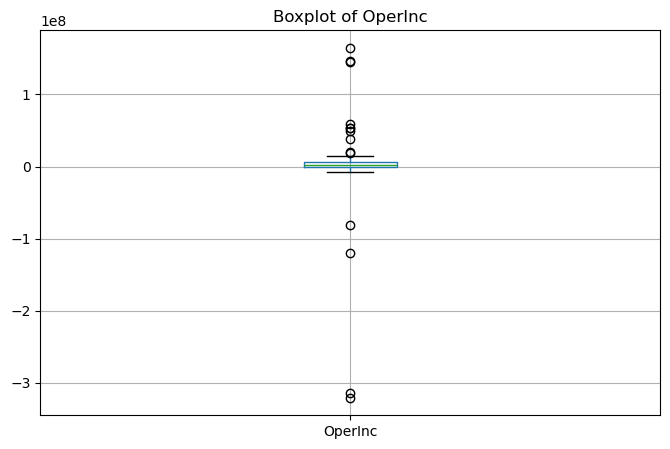

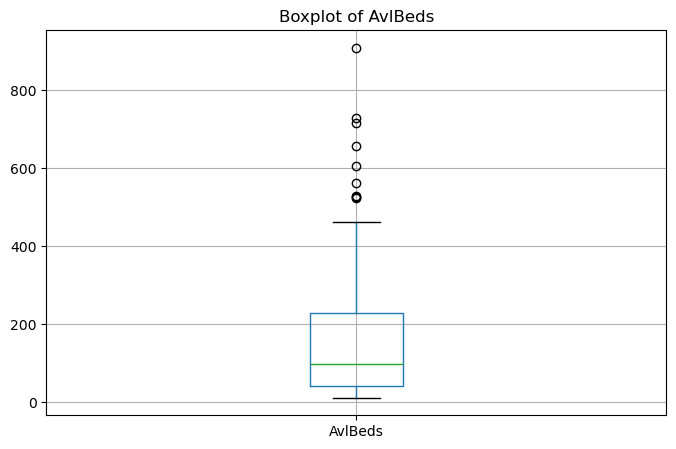

In [98]:
# list of variables to create boxplots
boxplot_vars = ['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds']

# create boxplots one at a time
for var in boxplot_vars:
    plt.figure(figsize=(8,5))
    merged_df.boxplot(column=var)
    plt.title(f'Boxplot of {var}')
    plt.grid(True)
    plt.show()


Overall, the boxplots reveal the presence of significant outliers across several variables, particularly in operational metrics such as NetPatRev, InOperExp, and OperRev. The distributions are generally right-skewed, indicating that a few large hospitals drive much of the variation in revenue and expenses.